In [1]:
# ---- Imports ----
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

from model.audio_dataset import AudioDatasetConfig, MuLawAudioDataset

In [3]:
# ---- Settings ----
data_dir = "data/MuMeRNN/data/synthodd16"
parameter_specs = {"mp": (52, 76)}
sequence_length = 1024
batch_size = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Dataset Config and Loader ----
data_config = AudioDatasetConfig(
    data_dir=data_dir,
    sequence_length=sequence_length,
    parameter_specs=parameter_specs
)

train_ds = MuLawAudioDataset(data_config)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

# ---- Get a batch ----
batch = next(iter(train_dl))
x, cond, y = [b.to(device) for b in batch]  # Shapes: [B, T-1], [B, T-1, p], [B, T-1]

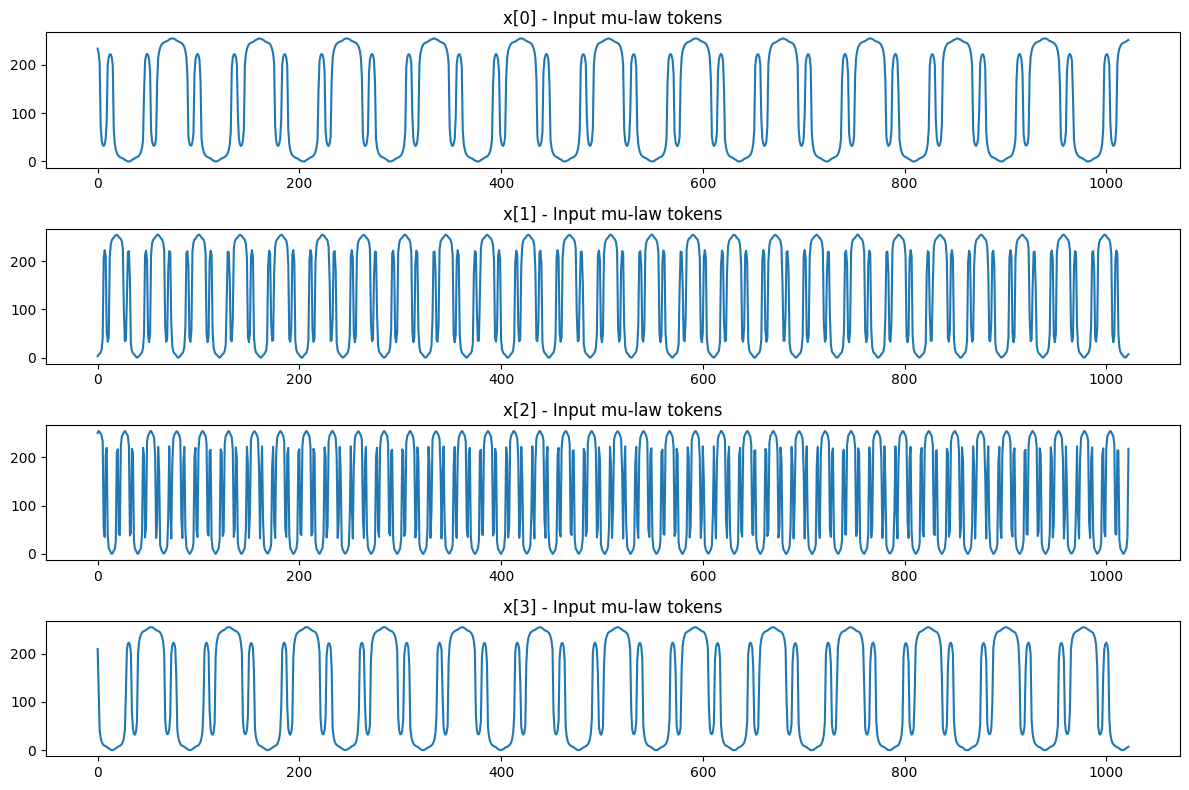

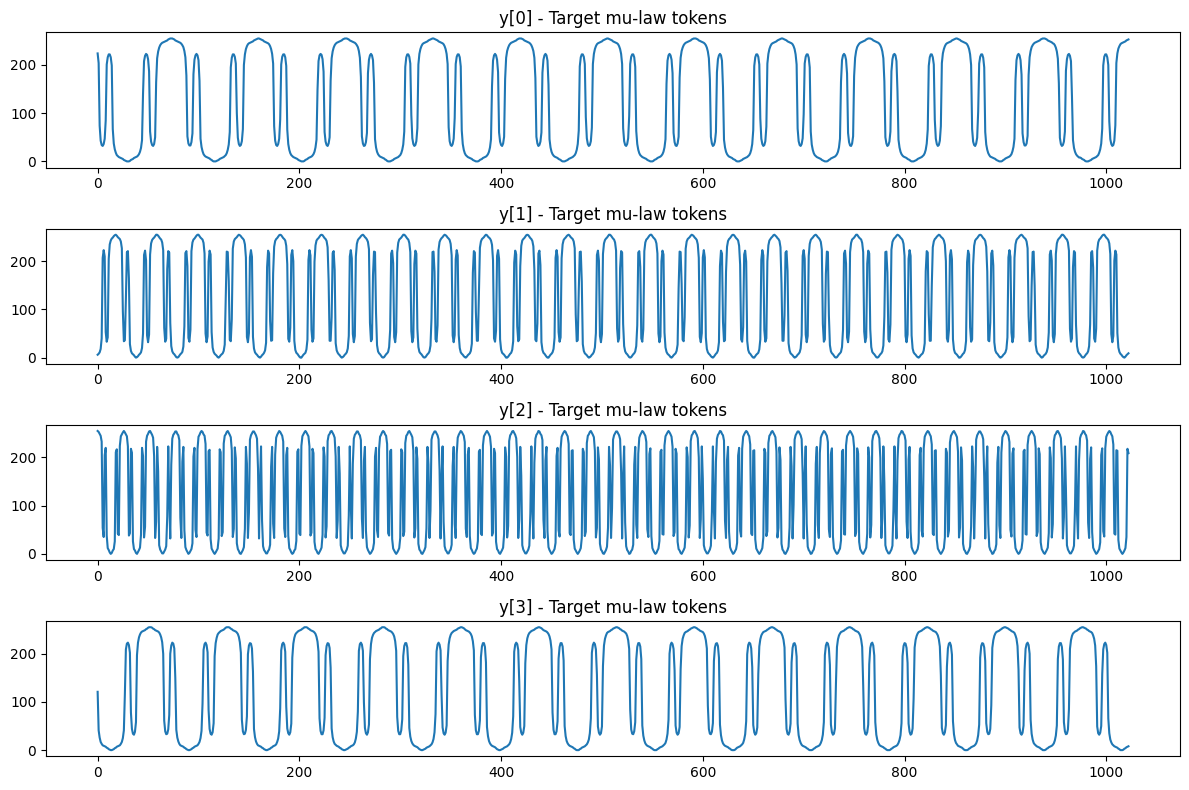

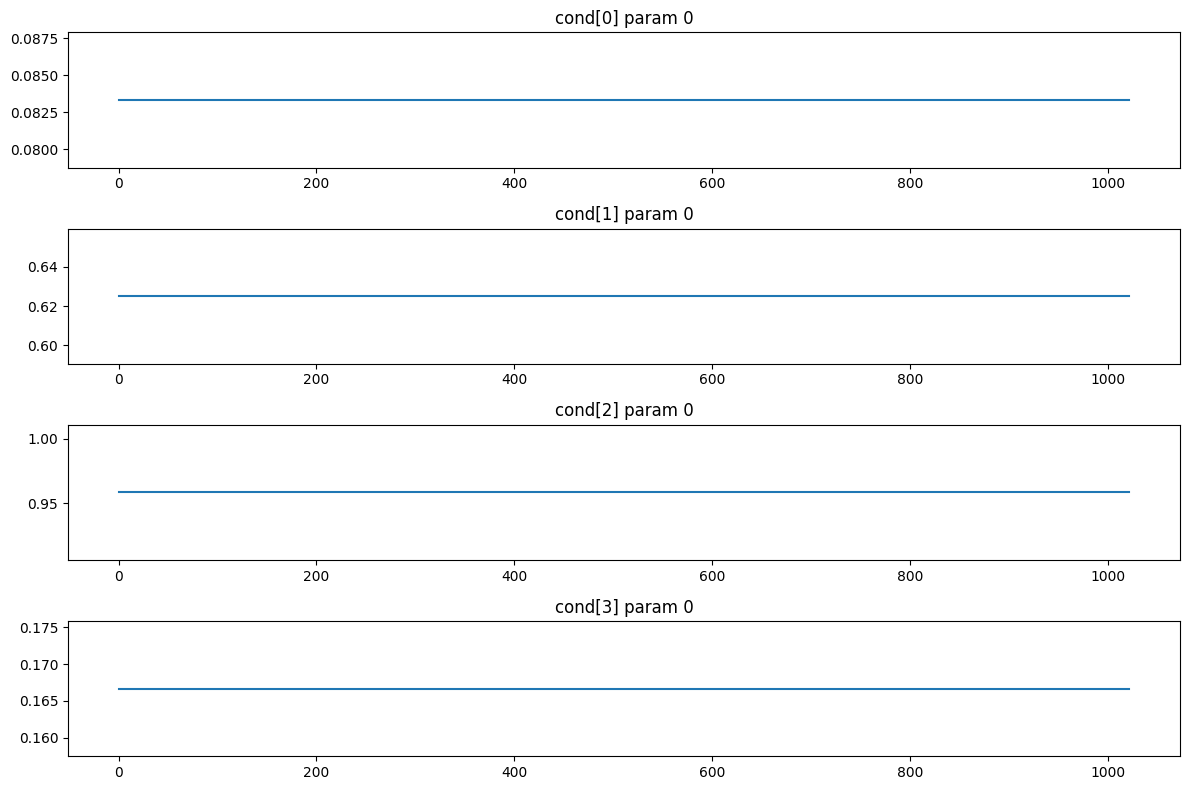

In [4]:
# ---- Plot x (input mu-law tokens) ----
plt.figure(figsize=(12, 2 * batch_size))
for i in range(batch_size):
    plt.subplot(batch_size, 1, i + 1)
    plt.plot(x[i].cpu().numpy())
    plt.title(f"x[{i}] - Input mu-law tokens")
plt.tight_layout()
plt.show()

# ---- Plot y (target mu-law tokens) ----
plt.figure(figsize=(12, 2 * batch_size))
for i in range(batch_size):
    plt.subplot(batch_size, 1, i + 1)
    plt.plot(y[i].cpu().numpy())
    plt.title(f"y[{i}] - Target mu-law tokens")
plt.tight_layout()
plt.show()

# ---- Plot cond (conditioning parameters) ----
p = cond.shape[-1]
for i in range(p):
    plt.figure(figsize=(12, 2 * batch_size))
    for b in range(batch_size):
        plt.subplot(batch_size, 1, b + 1)
        plt.plot(cond[b, :, i].cpu().numpy())
        plt.title(f"cond[{b}] param {i}")
    plt.tight_layout()
    plt.show()